In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import scipy.optimize as scop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso , Ridge ,lasso_path , ridge_regression ,LassoLars ,lars_path

In [1]:
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/Semester 2/CDS/superconduct/

C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\superconduct


## Reading the Data

In [3]:
df = pd.read_csv("train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
df.shape

(21263, 82)

In [4]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [5]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


### Data CleanUp

In [4]:
df1 = df.copy().drop("critical_temp" , axis = 1)
df1.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.609412,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.374099,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.534450,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.487021,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.599413,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wtd_entropy_Valence,0.892559,-0.145610,-0.331025,-0.307662,-0.448072,0.861479,0.918284,0.683238,-0.409599,0.540601,...,-0.558969,-0.636286,-0.563527,-0.648708,0.910822,1.000000,0.204411,-0.639818,0.089774,0.081284
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.085892,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.554338,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.164058,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856


In [5]:
data = df1.drop(df.columns[range(1,81,2)],axis = 1)

In [24]:
data.corr()

,number_of_elements,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
number_of_elements,1.000000,-0.353064,-0.454525,0.881845,-0.320293,0.546391,0.484445,0.424152,0.719209,0.329624,...,0.206069,-0.469206,0.207065,0.316772,0.665580,-0.648551,-0.659268,0.892559,-0.447770,0.035216
wtd_mean_atomic_mass,-0.353064,1.000000,0.964085,-0.412666,0.716623,-0.089471,-0.522595,-0.508109,-0.129779,-0.420457,...,-0.058075,0.250226,0.025638,-0.108512,-0.350993,0.545587,0.548981,-0.331025,0.330904,0.077323
wtd_gmean_atomic_mass,-0.454525,0.964085,1.000000,-0.484664,0.673326,-0.331657,-0.612317,-0.588014,-0.227652,-0.451326,...,-0.056793,0.322335,0.020495,-0.129212,-0.431027,0.614100,0.623261,-0.448072,0.409674,0.030361
wtd_entropy_atomic_mass,0.881845,-0.412666,-0.484664,1.000000,-0.543305,0.495970,0.531431,0.475331,0.698922,0.324119,...,0.184949,-0.505488,0.182082,0.302974,0.684497,-0.644336,-0.650247,0.918284,-0.546910,-0.006937
wtd_range_atomic_mass,-0.320293,0.716623,0.673326,-0.543305,1.000000,-0.063091,-0.409287,-0.393395,-0.234053,-0.114267,...,-0.061016,0.287490,0.009108,-0.069206,-0.346224,0.445874,0.445201,-0.409599,0.594214,0.092819
wtd_std_atomic_mass,0.546391,-0.089471,-0.331657,0.495970,-0.063091,1.000000,0.449619,0.406154,0.479914,0.226462,...,0.058402,-0.346671,0.066305,0.155144,0.443604,-0.394987,-0.414098,0.606574,-0.391024,0.155702
wtd_mean_fie,0.484445,-0.522595,-0.612317,0.531431,-0.409287,0.449619,1.000000,0.992331,0.079944,0.724828,...,-0.094193,-0.533758,-0.263213,0.108706,0.509899,-0.551527,-0.551444,0.446614,-0.391221,-0.125622
wtd_gmean_fie,0.424152,-0.508109,-0.588014,0.475331,-0.393395,0.406154,0.992331,1.000000,0.030222,0.711316,...,-0.111828,-0.485905,-0.258152,0.077105,0.445802,-0.479924,-0.480221,0.382479,-0.340174,-0.105682
wtd_entropy_fie,0.719209,-0.129779,-0.227652,0.698922,-0.234053,0.479914,0.079944,0.030222,1.000000,-0.280675,...,0.219691,-0.269555,0.463915,0.203354,0.385669,-0.340946,-0.375613,0.862061,-0.454246,0.332966
wtd_range_fie,0.329624,-0.420457,-0.451326,0.324119,-0.114267,0.226462,0.724828,0.711316,-0.280675,1.000000,...,-0.063461,-0.356802,-0.332363,0.188550,0.432511,-0.460419,-0.438015,0.137482,0.061797,-0.307760


In [6]:
cor_matrix = np.abs(data.corr())

In [7]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

drop1 = np.unique(to_drop)

data1 = data.drop(drop1 , axis = 1)
data1 = data1.drop("number_of_elements" , axis =1)
data1

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_15332/2414111471.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,wtd_mean_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_entropy_fie,wtd_range_fie,wtd_range_atomic_radius,wtd_std_Density,wtd_mean_ElectronAffinity,wtd_range_ElectronAffinity,wtd_std_ElectronAffinity,wtd_mean_FusionHeat,wtd_std_FusionHeat,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_std_ThermalConductivity,wtd_range_Valence,wtd_std_Valence
0,57.862692,31.794921,53.622535,1010.268571,0.791488,735.985714,42.914286,3572.596624,111.727143,80.987143,42.558396,3.846857,4.666920,61.015189,0.621979,0.262848,138.517163,1.085714,0.437059
1,58.518416,36.161939,53.979870,1010.612857,0.807078,743.164286,50.571429,3632.649185,112.316429,81.207857,41.667621,3.796857,4.603000,61.372331,0.619735,0.567706,139.630922,1.128571,0.468606
2,57.885242,35.741099,53.656268,1010.820000,0.773620,743.164286,49.314286,3592.019281,112.213571,81.207857,41.639878,3.822571,4.649635,60.943760,0.619095,0.250477,138.540613,1.114286,0.444697
3,57.873967,33.768010,53.639405,1010.544286,0.783207,739.575000,46.114286,3582.370597,111.970357,81.097500,42.102344,3.834714,4.658301,60.979474,0.620535,0.257045,138.528893,1.100000,0.440952
4,57.840143,27.848743,53.588771,1009.717143,0.805230,728.807143,36.514286,3552.668664,111.240714,80.766429,43.452059,3.871143,4.684014,61.086617,0.624878,0.272820,138.493671,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,53.095769,15.504479,43.202659,753.793333,0.927050,427.546667,57.808889,2978.412680,86.511111,74.140000,55.219027,34.448000,17.657417,111.537778,95.001493,0.634332,46.595943,2.168889,0.496904
21259,49.021367,7.353333,50.148287,989.819048,0.988470,659.771429,20.285714,3937.105612,100.490952,74.090000,57.634544,4.793429,5.204855,108.680590,1.577047,0.745515,156.558695,0.904762,0.212959
21260,95.609104,53.041104,5.405448,691.580000,0.542120,370.180000,124.600000,1381.200000,81.120000,59.040000,12.960000,24.780000,4.040000,57.400000,57.038314,0.559446,6.800000,3.200000,0.400000
21261,97.095602,31.115202,6.249958,706.969000,0.648876,208.799000,84.230000,1596.989169,77.556000,43.332000,14.984781,23.669000,4.671182,59.270000,58.781651,0.659671,7.862385,2.210000,0.462493


In [8]:
vif_data = pd.DataFrame()
vif_data["feature"] = data1.columns
vif_data["vif"] = [variance_inflation_factor(data1.values,i) for i in range(len(data1.columns))]
vif_data

,feature,vif
0,wtd_mean_atomic_mass,17.497199
1,wtd_range_atomic_mass,11.356286
2,wtd_std_atomic_mass,19.433432
3,wtd_mean_fie,102.019892
4,wtd_entropy_fie,58.675561
5,wtd_range_fie,59.080459
6,wtd_range_atomic_radius,12.823015
7,wtd_std_Density,12.594297
8,wtd_mean_ElectronAffinity,39.726635
9,wtd_range_ElectronAffinity,40.902897


## Splitting the Data

In [9]:
X_train, X_test, y_train,y_test = train_test_split(data1, df["critical_temp"], test_size=0.2, shuffle=False)

In [11]:
X_train

,wtd_mean_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_entropy_fie,wtd_range_fie,wtd_range_atomic_radius,wtd_std_Density,wtd_mean_ElectronAffinity,wtd_range_ElectronAffinity,wtd_std_ElectronAffinity,wtd_mean_FusionHeat,wtd_std_FusionHeat,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_std_ThermalConductivity,wtd_range_Valence,wtd_std_Valence
0,57.862692,31.794921,53.622535,1010.268571,0.791488,735.985714,42.914286,3572.596624,111.727143,80.987143,42.558396,3.846857,4.666920,61.015189,0.621979,0.262848,138.517163,1.085714,0.437059
1,58.518416,36.161939,53.979870,1010.612857,0.807078,743.164286,50.571429,3632.649185,112.316429,81.207857,41.667621,3.796857,4.603000,61.372331,0.619735,0.567706,139.630922,1.128571,0.468606
2,57.885242,35.741099,53.656268,1010.820000,0.773620,743.164286,49.314286,3592.019281,112.213571,81.207857,41.639878,3.822571,4.649635,60.943760,0.619095,0.250477,138.540613,1.114286,0.444697
3,57.873967,33.768010,53.639405,1010.544286,0.783207,739.575000,46.114286,3582.370597,111.970357,81.097500,42.102344,3.834714,4.658301,60.979474,0.620535,0.257045,138.528893,1.100000,0.440952
4,57.840143,27.848743,53.588771,1009.717143,0.805230,728.807143,36.514286,3552.668664,111.240714,80.766429,43.452059,3.871143,4.684014,61.086617,0.624878,0.272820,138.493671,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17005,40.008985,8.498615,34.158004,1008.307692,0.892147,668.400000,14.000000,3633.635346,106.183846,76.135385,54.747896,5.071846,5.481655,124.475851,1.594861,0.618275,166.155376,0.923077,0.000000
17006,39.195213,8.147733,32.671623,1005.886667,0.895960,666.820000,16.966667,3643.940769,105.651667,75.355000,55.141067,5.131733,5.491436,127.880843,1.714351,0.625132,166.337279,0.933333,0.000000
17007,52.577994,11.441059,54.300348,989.741176,0.988183,660.529412,20.588235,3987.234660,100.090588,74.985882,57.656176,4.622235,5.108072,98.955248,1.384605,0.764465,152.681446,0.882353,0.235294
17008,114.020000,56.444000,11.823045,788.750000,0.573540,377.870000,36.100000,1641.936872,95.310000,51.270000,14.343462,24.590000,7.469598,58.500000,40.649229,0.599607,52.699620,1.700000,0.458258


## Fitting OLS

In [16]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          critical_temp   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              4577.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                        0.00
Time:                        14:00:50   Log-Likelihood:                         -76012.
No. Observations:               17010   AIC:                                  1.521e+05
Df Residuals:                   16991   BIC:                                  1.522e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

## Lasso fitting

In [12]:
lass = Lasso(alpha=0.9).fit(X_train,y_train)

In [14]:
Lasso_coef = lass.coef_[lass.coef_ != 0]
Lasso_coef

array([ 4.25595820e-02, -1.03371400e-01,  3.23380283e-01,  1.55329348e-02,
        2.65181395e-02, -4.50258378e-02, -2.60664527e-03, -2.39433998e-01,
        6.69689515e-03,  2.30045702e-01,  1.78582468e-01, -4.29235212e-01,
        5.67089069e-01, -5.41554375e-01,  2.54010702e+00, -5.50552763e-02,
       -6.59242523e+00])

## Comparision of OLS and LASSO

In [17]:
res.params

wtd_mean_atomic_mass               -0.013075
wtd_range_atomic_mass              -0.036294
wtd_std_atomic_mass                 0.363357
wtd_mean_fie                        0.015818
wtd_entropy_fie                    -6.307483
wtd_range_fie                       0.014255
wtd_range_atomic_radius            -0.115584
wtd_std_Density                    -0.002605
wtd_mean_ElectronAffinity          -0.211187
wtd_range_ElectronAffinity          0.045513
wtd_std_ElectronAffinity            0.209730
wtd_mean_FusionHeat                 0.115991
wtd_std_FusionHeat                 -0.530601
wtd_mean_ThermalConductivity        0.642173
wtd_gmean_ThermalConductivity      -0.629239
wtd_entropy_ThermalConductivity    24.395890
wtd_std_ThermalConductivity        -0.085142
wtd_range_Valence                   2.675245
wtd_std_Valence                   -18.951218
dtype: float64

In [18]:
lass.coef_


array([ 4.25595820e-02, -1.03371400e-01,  3.23380283e-01,  1.55329348e-02,
        0.00000000e+00,  2.65181395e-02, -4.50258378e-02, -2.60664527e-03,
       -2.39433998e-01,  6.69689515e-03,  2.30045702e-01,  1.78582468e-01,
       -4.29235212e-01,  5.67089069e-01, -5.41554375e-01,  2.54010702e+00,
       -5.50552763e-02,  0.00000000e+00, -6.59242523e+00])

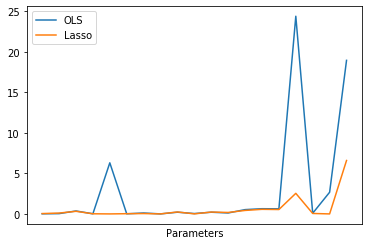

In [208]:
plt.plot(np.abs(res.params))
plt.plot(np.abs(lass.coef_))
plt.xticks("")
plt.xlabel("Parameters")
plt.legend(["OLS","Lasso"])
plt.show()

.

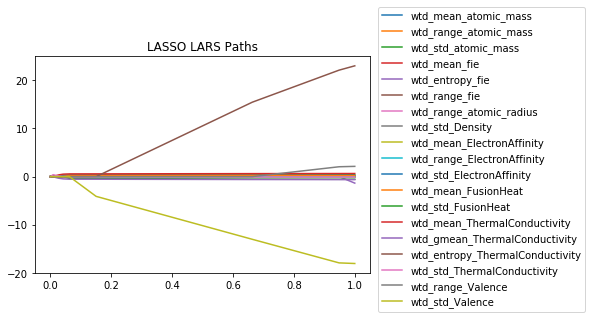

In [222]:
_,_,coefs = lars_path(np.array(X_train), np.array(y_train),method = "lar", verbose=True)

xx = np.sum(np.abs(np.matrix(coefs.T)), axis=1)
xx /= xx[-1]

plt.plot(xx,coefs.T)
plt.title("LASSO LARS Paths")
plt.legend(X_train.columns,loc = "best",bbox_to_anchor =(1.01, 1.25))
plt.show()

In [214]:
a,coefs,b = lasso_path(np.array(X_train), np.array(y_train))

.

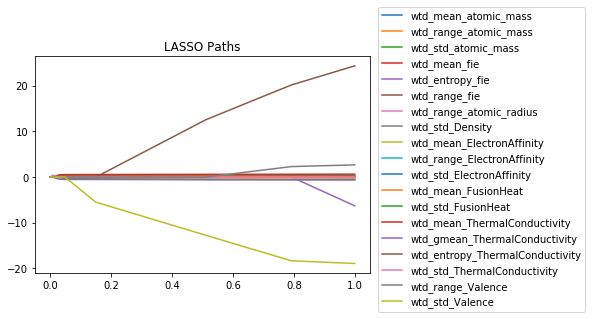

In [223]:
_,_,coefs = lars_path(np.array(X_train), np.array(y_train),method = "lasso", verbose=True)

xx = np.sum(np.abs(np.matrix(coefs.T)), axis=1)
xx /= xx[-1]

plt.plot(xx,coefs.T)
plt.title("LASSO Paths")
plt.legend(X_train.columns,loc = "best",bbox_to_anchor =(1.01, 1.25))
plt.show()

## Ridge Regresion

In [205]:
rid = ridge_regression(X_train,y_train,alpha = 0.5)
print(f"The parameters are :{rid}")

The parameters are :[-1.30631948e-02 -3.63111182e-02  3.63236747e-01  1.58023119e-02
 -6.27265669e+00  1.42840406e-02 -1.15603821e-01 -2.60479322e-03
 -2.11182762e-01  4.54404776e-02  2.09702429e-01  1.16069847e-01
 -5.30704018e-01  6.42019119e-01 -6.29058376e-01  2.43649229e+01
 -8.51622294e-02  2.67446257e+00 -1.89451511e+01]


### Comparision between Ridge and OLS

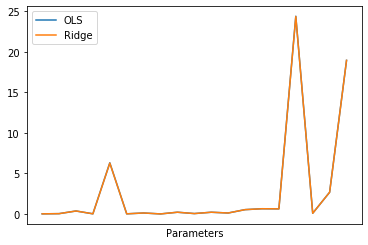

In [210]:
plt.plot(np.abs(res.params))
plt.plot(np.abs(rid))
plt.xticks("")
plt.legend(["OLS","Ridge"])
plt.xlabel("Parameters")
plt.show()

.

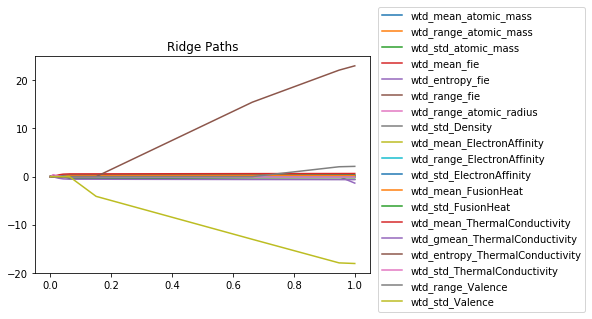

In [219]:
_,_,coefs = lars_path(np.array(X_train), np.array(y_train),method = "Ridge", verbose=True)

xx = np.sum(np.abs(np.matrix(coefs.T)), axis=1)
xx /= xx[-1]

plt.plot(xx,coefs.T)
plt.title("Ridge Paths")
plt.legend(X_train.columns,loc = "best",bbox_to_anchor =(1.01, 1.25))
plt.show()